In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download price data
df = yf.download('GS', start='2019-01-01')  # Ticker example

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
print(df.columns)
print(df.head())


MultiIndex([( 'Close', 'GS'),
            (  'High', 'GS'),
            (   'Low', 'GS'),
            (  'Open', 'GS'),
            ('Volume', 'GS')],
           names=['Price', 'Ticker'])
Price            Close        High         Low        Open   Volume
Ticker              GS          GS          GS          GS       GS
Date                                                               
2019-01-02  148.403702  148.593488  140.915804  141.761209  3999400
2019-01-03  146.229858  148.179483  145.177410  147.221928  4060200
2019-01-04  151.008987  151.828514  147.601475  149.231906  3788300
2019-01-07  151.845734  153.407149  148.610752  151.164223  3152100
2019-01-08  151.285019  153.640095  149.154243  153.364037  2692700


In [4]:
df.rename(columns={'Close': 'Adj Close'}, inplace=True)

In [5]:
df['SMA'] = df['Adj Close'].rolling(21).mean()
df['StdDev'] = df['Adj Close'].rolling(21).std()

In [6]:
df = yf.download('GS', start='2020-01-01')
print(df.columns)

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'GS'),
            (  'High', 'GS'),
            (   'Low', 'GS'),
            (  'Open', 'GS'),
            ('Volume', 'GS')],
           names=['Price', 'Ticker'])


In [7]:
df = yf.download('GS', start='2020-01-01', auto_adjust=False)
print(df.columns)

[*********************100%***********************]  1 of 1 completed

MultiIndex([('Adj Close', 'GS'),
            (    'Close', 'GS'),
            (     'High', 'GS'),
            (      'Low', 'GS'),
            (     'Open', 'GS'),
            (   'Volume', 'GS')],
           names=['Price', 'Ticker'])


In [8]:
df.columns = [f"{col[0]}" for col in df.columns]
print(df.columns)


Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [9]:
df['SMA'] = df['Adj Close'].rolling(21).mean()
df['StdDev'] = df['Adj Close'].rolling(21).std()
df['Upper'] = df['SMA'] + 2 * df['StdDev']
df['Lower'] = df['SMA'] - 2 * df['StdDev']

In [10]:
df

,Adj Close,Close,High,Low,Open,Volume,SMA,StdDev,Upper,Lower
Date,,,,,,,,,,
2020-01-02,206.306183,234.320007,234.639999,230.160004,231.000000,3736300,NaN,NaN,NaN,NaN
2020-01-03,203.893814,231.580002,232.610001,230.300003,231.600006,2274500,NaN,NaN,NaN,NaN
2020-01-06,205.980377,233.949997,234.020004,229.490005,229.929993,3329300,NaN,NaN,NaN,NaN
2020-01-07,207.336319,235.490005,237.770004,234.759995,235.000000,5255200,NaN,NaN,NaN,NaN
2020-01-08,209.334900,237.759995,239.750000,235.479996,235.679993,3564700,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-03-25,585.940002,585.940002,586.890015,578.210022,584.690002,1875500,570.477987,29.988724,630.455434,510.500539
2025-03-26,573.919983,573.919983,592.640015,571.000000,588.390015,1944200,568.670561,28.474486,625.619534,511.721589
2025-03-27,558.919983,558.919983,566.000000,552.549988,565.000000,2100900,566.013332,26.497176,619.007683,513.018981


In [11]:
df['Buy'] = np.where(df.Lower > df['Adj Close'], True,False)
df['Sell'] = np.where(df.Upper < df['Adj Close'], True,False)

In [12]:
df

,Adj Close,Close,High,Low,Open,Volume,SMA,StdDev,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2020-01-02,206.306183,234.320007,234.639999,230.160004,231.000000,3736300,NaN,NaN,NaN,NaN,False,False
2020-01-03,203.893814,231.580002,232.610001,230.300003,231.600006,2274500,NaN,NaN,NaN,NaN,False,False
2020-01-06,205.980377,233.949997,234.020004,229.490005,229.929993,3329300,NaN,NaN,NaN,NaN,False,False
2020-01-07,207.336319,235.490005,237.770004,234.759995,235.000000,5255200,NaN,NaN,NaN,NaN,False,False
2020-01-08,209.334900,237.759995,239.750000,235.479996,235.679993,3564700,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,585.940002,585.940002,586.890015,578.210022,584.690002,1875500,570.477987,29.988724,630.455434,510.500539,False,False
2025-03-26,573.919983,573.919983,592.640015,571.000000,588.390015,1944200,568.670561,28.474486,625.619534,511.721589,False,False
2025-03-27,558.919983,558.919983,566.000000,552.549988,565.000000,2100900,566.013332,26.497176,619.007683,513.018981,False,False


In [13]:
df.dropna()

,Adj Close,Close,High,Low,Open,Volume,SMA,StdDev,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2020-01-31,209.326126,237.750000,242.889999,236.880005,241.990005,3482800,212.818138,4.549609,221.917356,203.718920,False,False
2020-02-03,210.435501,239.009995,242.389999,238.050003,238.360001,2733000,213.014772,4.338423,221.691618,204.337926,False,False
2020-02-04,213.015213,241.940002,243.740005,241.550003,242.880005,3052500,213.449124,3.803186,221.055496,205.842752,False,False
2020-02-05,215.093063,244.300003,245.130005,243.000000,244.990005,3126600,213.883062,3.407716,220.698493,207.067631,False,False
2020-02-06,212.909576,241.820007,245.770004,241.179993,245.350006,2225600,214.148455,3.072940,220.294335,208.002575,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-25,585.940002,585.940002,586.890015,578.210022,584.690002,1875500,570.477987,29.988724,630.455434,510.500539,False,False
2025-03-26,573.919983,573.919983,592.640015,571.000000,588.390015,1944200,568.670561,28.474486,625.619534,511.721589,False,False
2025-03-27,558.919983,558.919983,566.000000,552.549988,565.000000,2100900,566.013332,26.497176,619.007683,513.018981,False,False


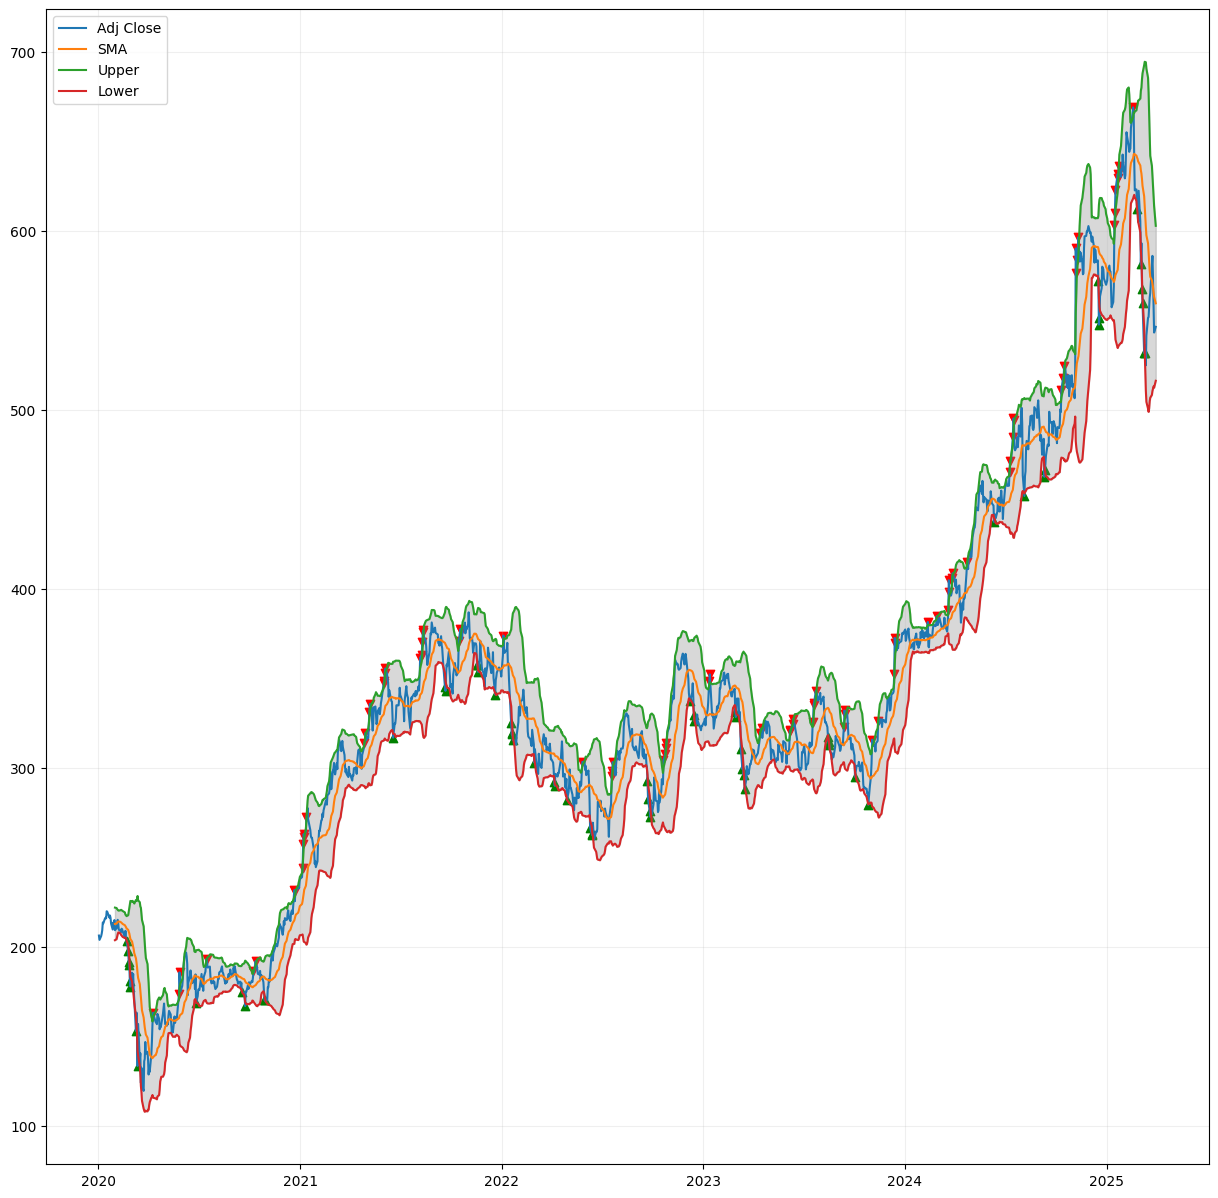

In [14]:
plt.rcParams['figure.figsize'] = 15,15
plt.grid(True, alpha = 0.2)
plt.plot(df[['Adj Close','SMA','Upper','Lower']])
plt.legend(['Adj Close','SMA','Upper','Lower'],loc=2)
plt.scatter(df.index[df['Buy']],df[df['Buy']]['Adj Close'], marker = '^',color = 'g')
plt.scatter(df.index[df['Sell']],df[df['Sell']]['Adj Close'], marker = 'v',color = 'r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)

In [15]:
buys = []
sells = []
open_posi = False

for i in range(len(df)):
    if df.Lower[i] > df['Adj Close'][i]:
        if open_posi == False:
            buys.append(i)
            open_posi = True
    elif df.Upper[i] < df['Adj Close'][i]:
        if open_posi:
            sells.append(i)
            open_posi = False

<ipython-input-15-fab4e2c23bba>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.Lower[i] > df['Adj Close'][i]:
<ipython-input-15-fab4e2c23bba>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df.Upper[i] < df['Adj Close'][i]:


In [16]:
buys

[34,
 122,
 179,
 208,
 368,
 432,
 474,
 515,
 615,
 686,
 740,
 794,
 910,
 944,
 1117,
 1154,
 1248,
 1293]

In [17]:
sells

[68,
 134,
 194,
 245,
 402,
 451,
 506,
 606,
 640,
 707,
 763,
 826,
 930,
 967,
 1135,
 1202,
 1266]

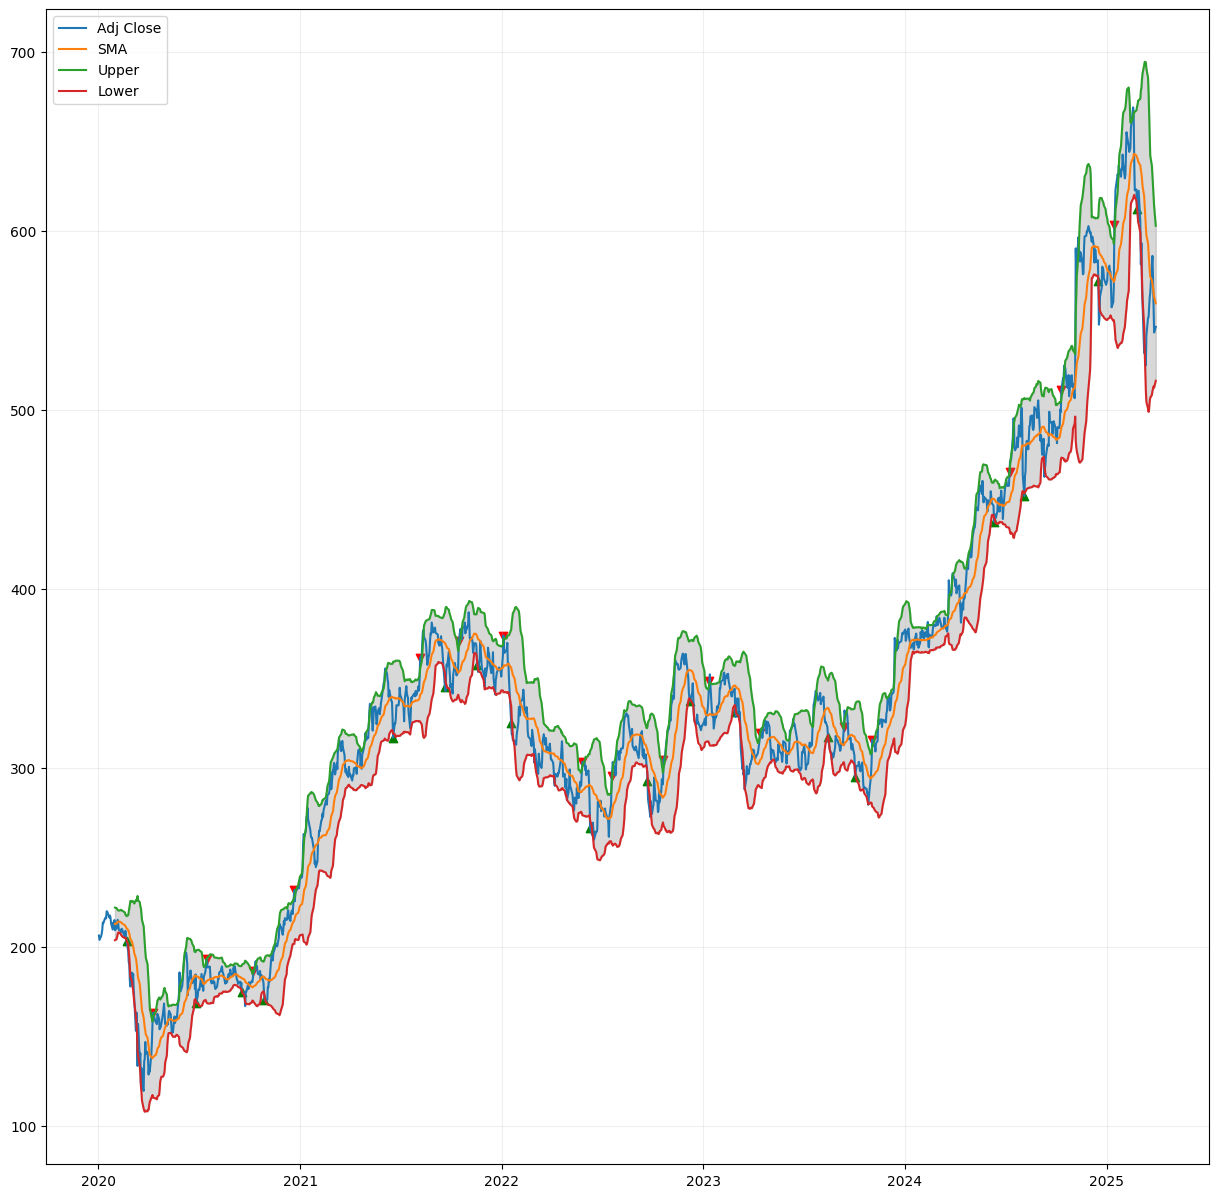

In [18]:
plt.rcParams['figure.figsize'] = 15,15
plt.grid(True, alpha = 0.2)
plt.plot(df[['Adj Close','SMA','Upper','Lower']])
plt.legend(['Adj Close','SMA','Upper','Lower'],loc=2)
plt.scatter(df.iloc[buys].index,df.iloc[buys]['Adj Close'], marker = '^',color = 'g')
plt.scatter(df.iloc[sells].index,df.iloc[sells]['Adj Close'], marker = 'v',color = 'r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)

In [19]:
x = df.iloc[buys]['Adj Close']
y = df.iloc[sells]['Adj Close']
merged = pd.concat([x,y],axis=1)

In [20]:
merged.columns = ['Buys','Sells']

In [22]:
merged

,Buys,Sells
Date,,
2020-02-21,203.048553,NaN
2020-04-09,NaN,163.222946
2020-06-26,168.637695,NaN
2020-07-15,NaN,193.337479
2020-09-17,174.716492,NaN
2020-10-08,NaN,186.508896
2020-10-28,170.178864,NaN
2020-12-21,NaN,231.706436
2021-06-18,316.824951,NaN


In [23]:
totalprofits = merged.shift(-1).Sells - merged.Buys

In [24]:
totalprofits

,0
Date,
2020-02-21,-39.825607
2020-04-09,NaN
2020-06-26,24.699783
2020-07-15,NaN
2020-09-17,11.792404
2020-10-08,NaN
2020-10-28,61.527573
2020-12-21,NaN
2021-06-18,44.558868


In [25]:
realprofit = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [27]:
realprofit.mean()

np.float64(0.0620519227798629)